### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피  쳐 : Weight, Length
- 타  겟 : Species
- 유  형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비  

In [181]:
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈


In [182]:
data_file = '../data/fish.csv'

In [183]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [184]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream','Smelt'])   # Boolean INdexing
fishDF[mask]

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [185]:
twoFishDF=fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [186]:
# 표준 정규분포 => 평균 0, 표준편차 1 => z-score = (피쳐 - 평균)/표준편차
# Weight 컬럼
twoFishDF.Weight.mean(), twoFishDF.Weight.std()

(444.5, 328.1432328267642)

In [187]:
ret1=twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1/twoFishDF.Weight.std()

In [188]:
# Length 컬럼
ret1=twoFishDF.Length - twoFishDF.Length.mean()
ret1 = ret1/twoFishDF.Length.std()

(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리 <hr>

In [189]:
# 피쳐/특성/속성 데이터 추출
featureDF=twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [190]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수인코딩
targetDF=twoFishDF['Species']
targetDF.head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [191]:
targetDF=targetDF.replace({'Bream':0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int64'),
 0    0
 1    0
 Name: Species, dtype: int64)

(3-1) 학습/테스트 데이터셋 분리 <hr>
 - 지도학습 중 분류 => [고려] 타겟의 비율
  - 학습 : 테스트 = 80:20

In [192]:
# 모듈로딩
from sklearn.model_selection import train_test_split

In [193]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2,
                                                    stratify=targetDF)

In [194]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ===\n{x_train.shape}, {y_train.shape} ')
print(f'\n {y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ===\n{x_test.shape}, {y_test.shape} ')
print(f'\n {y_train.value_counts()/y_test.shape[0]}')



학습용 데이터셋 ===
(39, 2), (39,) 

 Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ===
(10, 2), (10,) 

 Species
0    2.8
1    1.1
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링 <hr>
   - 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
   - scikit-learn의 preprocessing 모듈 활용

In [223]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [196]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [197]:
scaler = StandardScaler()

In [198]:
scaler.fit(x_train)

StandardScaler()

In [199]:
scaler.mean_

array([432.75384615,  26.86666667])

In [200]:
scaler.transform(x_train)

array([[ 0.77712382,  0.82126991],
       [ 0.55710556,  0.6698062 ],
       [-1.33819455, -1.64253982],
       [-1.33285125, -1.57185676],
       [ 1.70434361,  1.42712477],
       [ 1.53147212,  1.17468524],
       [ 0.83998618,  0.82126991],
       [-1.29764833, -1.19824627],
       [ 0.90284854,  0.82126991],
       [-0.29153628,  0.51834249],
       [ 0.52567439,  0.51834249],
       [ 0.21136259,  0.28609813],
       [-1.33913748, -1.72332047],
       [ 0.79283941,  0.7202941 ],
       [ 0.0542067 ,  0.31639087],
       [ 0.88398983,  0.92224572],
       [-0.59956183, -0.14809785],
       [-1.32907951, -1.52136885],
       [ 0.44709644,  0.7202941 ],
       [ 1.64148125,  1.17468524],
       [-1.29827695, -1.26892933],
       [-1.33662299, -1.6526374 ],
       [-0.00865566,  0.21541506],
       [-1.32939382, -1.58195434],
       [ 0.21136259,  0.41736668],
       [ 0.91856413,  0.82126991],
       [-0.13438038,  0.31639087],
       [ 0.0542067 ,  0.28609813],
       [ 1.31145387,

In [201]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train=scaler.transform(x_train)
scaled_x_train.shape

(39, 2)

In [202]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test=scaler.transform(x_test)
scaled_x_test.shape

(10, 2)

(3-3) 시각화

In [203]:
# 모듈 로딩
import matplotlib.pyplot as plt

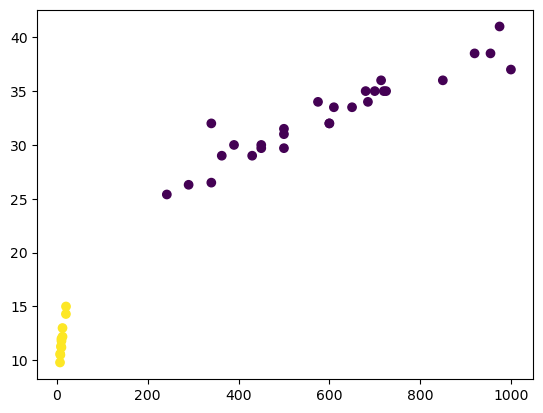

In [204]:
## => 원본 데이터 시각화
plt.scatter(x_train.Weight, x_train.Length, c=y_train)
plt.show()

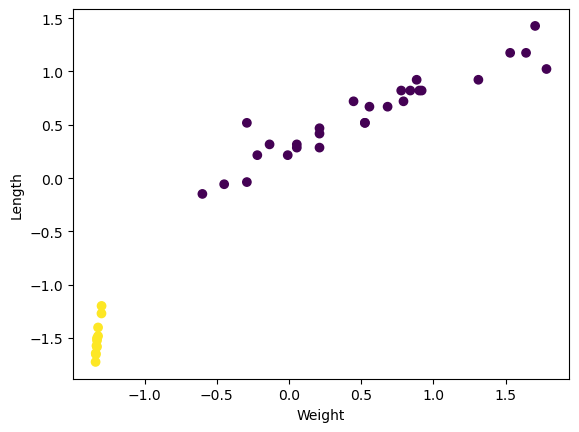

In [205]:
## => 스케일된 데이터 시각화 ==> scaled_x_train ndarray 타입
plt.scatter(scaled_x_train[:,0], scaled_x_train[:,1], c= y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(4) 학습 진행

In [207]:
## 방법 (1): KNN 알고리즘
fishModel=KNeighborsClassifier()
fishModel

KNeighborsClassifier()

In [208]:
# 학습
fishModel.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [216]:
## 방법 (2): SVC
from sklearn.svm import SVC

fishModel2=SVC()
fishModel2.fit(scaled_x_train, y_train)

SVC()

In [218]:
## 방법 (3): LogisticRegression
from sklearn.linear_model import LogisticRegression
fishModel3=LogisticRegression()
fishModel3.fit(scaled_x_train, y_train)

LogisticRegression()

(5) 테스트 진행

In [209]:
fishModel.score(scaled_x_test, y_test)

1.0

In [220]:
fishModel2.score(scaled_x_test, y_test)

1.0

In [221]:
fishModel3.score(scaled_x_test, y_test)

1.0

In [222]:
print(f'KNN : {fishModel.score(scaled_x_test, y_test)}')
print(f'SVC : {fishModel2.score(scaled_x_test, y_test)}')
print(f'LogisticRegression : {fishModel3.score(scaled_x_test, y_test)}')

KNN : 1.0
SVC : 1.0
LogisticRegression : 1.0


(6) 예측 <hr>

In [210]:
## 길이 25, 무게 160인 생선의 품종 예측 ......
new_data=pd.DataFrame([[160,25]], columns=twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


In [212]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [215]:
# 예측
y_pre = fishModel.predict(scaled_new_data)          # 0이니 'Bream'
y_pre

array([0], dtype=int64)